In [17]:
import numpy as np
import pandas as pd
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn("SVC")
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
#unpatch_sklearn()

In [2]:
df = pd.read_csv('satellite_data.csv')
df.head()

,# 1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,0.186809,2.134734,5.312087,5.636209,4.847459,3.531812,2.134734,1.124049,0.562024,0.292189,...,0.086874,0.043437,0.021719,0.001974,0.011846,12.564405,0.080385,0.024177,0.400888,2.0
1,0.156780,1.264830,3.624999,6.756354,8.881353,7.036015,3.463982,1.769067,0.737288,0.377119,...,0.006410,0.006410,0.002137,0.008547,0.004273,10.983295,0.088937,0.024603,0.451096,2.0
2,1.318666,4.578010,3.758613,5.176801,4.242953,2.778321,1.894235,1.061568,0.771295,0.694995,...,0.014096,0.007048,0.002349,0.004699,0.004699,10.526232,0.112281,0.026046,0.568862,2.0
3,0.233516,3.577804,9.472423,5.269129,2.416894,1.622939,1.274332,1.060831,0.785616,0.637166,...,0.072552,0.031094,0.004146,0.002073,0.004146,18.478659,0.065183,0.021700,0.210233,2.0
4,2.265238,12.861479,8.418392,3.363587,0.555172,0.188484,0.119945,0.121658,0.095956,0.046264,...,0.011572,0.006943,0.006943,0.002314,0.002314,6.770452,0.148247,0.041204,0.582118,2.0


## Classical Models

### Linear SVM

In [3]:
from sklearn.metrics import classification_report

In [16]:
%%time
# Evaluate model using cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
precision, recall, f1 = 0, 0, 0
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    x_train = X.iloc[train_index, :]
    y_train = y[train_index]
    x_test = X.iloc[test_index, :]
    y_test = y[test_index]
    
    clf = make_pipeline(StandardScaler(), SVC(kernel='linear'))
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision += report['macro avg']['precision']
    recall += report['macro avg']['recall']
    f1 += report['macro avg']['f1-score'] 

CPU times: total: 1.34 s
Wall time: 418 ms


In [6]:
accuracy = (precision + recall + f1)/15
print(f'Accuracy: {accuracy}')

Accuracy: 0.8459031136810137


In [7]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.90      0.87      0.88       335
         2.0       0.85      0.87      0.86       335
         3.0       0.83      0.90      0.86       336
         4.0       0.82      0.72      0.77       334
         5.0       0.90      0.88      0.89       334
         6.0       0.78      0.82      0.80       342

    accuracy                           0.84      2016
   macro avg       0.85      0.84      0.84      2016
weighted avg       0.85      0.84      0.84      2016



### Radial SVM

In [10]:
# Evaluate model using cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
precision, recall, f1 = 0, 0, 0
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X, y):
    x_train = X.iloc[train_index, :]
    y_train = y[train_index]
    x_test = X.iloc[test_index, :]
    y_test = y[test_index]
    
    clf = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision += report['macro avg']['precision']
    recall += report['macro avg']['recall']
    f1 += report['macro avg']['f1-score'] 

In [11]:
accuracy = (precision + recall + f1)/15
print(f'Accuracy: {accuracy}')

Accuracy: 0.8298456617277109


In [12]:
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

              precision    recall  f1-score   support

         1.0       0.92      0.85      0.88       335
         2.0       0.87      0.83      0.85       335
         3.0       0.82      0.86      0.84       336
         4.0       0.83      0.65      0.73       334
         5.0       0.86      0.90      0.88       334
         6.0       0.71      0.87      0.78       342

    accuracy                           0.83      2016
   macro avg       0.83      0.83      0.83      2016
weighted avg       0.83      0.83      0.83      2016



## Multilayer Perceptron

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
parameter_space = {
    'hidden_layer_sizes': [
        (100,), (150,), (200,),  # Single layer
        (100, 100), (150, 150), (200, 200),  # Two layers
    ]
}

In [58]:
# model = make_pipeline(
#     StandardScaler(), 
#     MLPClassifier()
# )

# mlp_gs = GridSearchCV(
#     model,
#     parameter_space,
#     cv=5, # cross validation
#     n_jobs=-1
# )

model = make_pipeline(StandardScaler(), 
    GridSearchCV(
        MLPClassifier(),
        param_grid=parameter_space,
        cv=5,
        n_jobs=-1,
        scoring=['accuracy', 'recall_micro'],
        refit='accuracy',
        error_score="raise"
    )
)

In [59]:
model.fit(X, y)

C:\Users\cumpl\miniconda3\envs\clustering_task\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, error_score='raise',
                              estimator=MLPClassifier(), n_jobs=-1,
                              param_grid={'hidden_layer_sizes': [(100,), (150,),
                                                                 (200,),
                                                                 (100, 100),
                                                                 (150, 150),
                                                                 (200, 200)]},
                              refit='accuracy',
                              scoring=['accuracy', 'recall_micro']))])

In [60]:
model.named_steps['gridsearchcv'].cv_results_

{'mean_fit_time': array([ 5.69022794,  8.31750221,  8.10585065, 11.02490587, 19.43154759,
        20.67826428]),
 'std_fit_time': array([0.30416291, 1.21499222, 0.90047403, 0.9795088 , 0.97382145,
        1.07818129]),
 'mean_score_time': array([0.00895963, 0.0186769 , 0.012672  , 0.01448112, 0.00771365,
        0.00667758]),
 'std_score_time': array([0.00425975, 0.01016537, 0.01140448, 0.00804032, 0.00339056,
        0.00582299]),
 'param_hidden_layer_sizes': masked_array(data=[(100,), (150,), (200,), (100, 100), (150, 150),
                    (200, 200)],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (100,)},
  {'hidden_layer_sizes': (150,)},
  {'hidden_layer_sizes': (200,)},
  {'hidden_layer_sizes': (100, 100)},
  {'hidden_layer_sizes': (150, 150)},
  {'hidden_layer_sizes': (200, 200)}],
 'split0_test_accuracy': array([0.87871287, 0.87871287, 0.88366337, 0.86881188, 0.88613861,
 

In [61]:
model.named_steps['gridsearchcv'].best_params_

{'hidden_layer_sizes': (200,)}

In [62]:
model.named_steps['gridsearchcv'].best_score_

0.861099918924895

In [18]:
data = pd.DataFrame({
    'Model': ["CNN", "MLP"] * 3,
    'Score': [0.86, 0.86, 0.965, 0.971, 0.89, 0.90],
    'Dataset': ["Satellite Images"] * 2 +  ["White Blood Cells"] * 2 + ["Fashion MNIST"] * 2 
})

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set(style="whitegrid")

<AxesSubplot:xlabel='Dataset', ylabel='Score'>

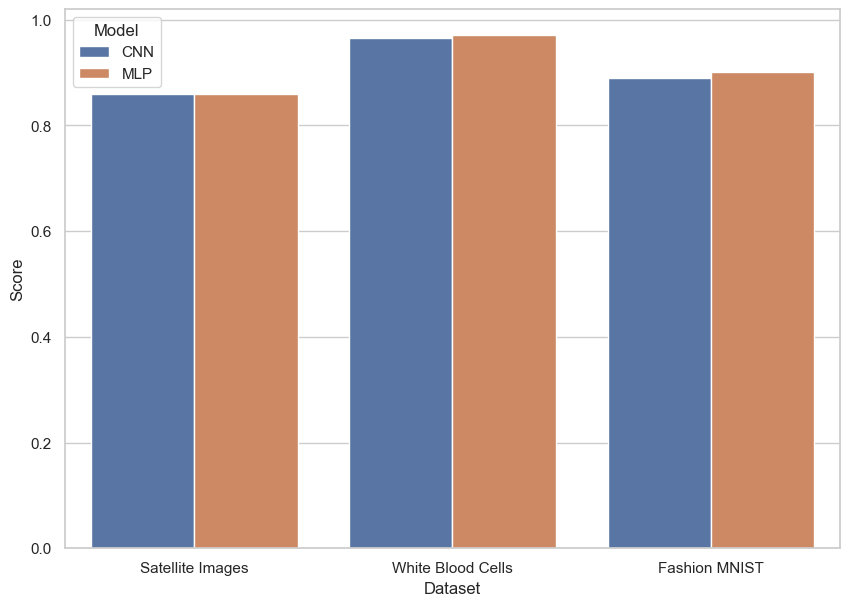

In [21]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
sns.barplot(x = 'Dataset', y='Score', data=data, hue='Model', ax=ax)

In [23]:
fig.savefig('comparison_CNN.png')